In [2]:
import numpy as np
import pandas as pd

import json

In [22]:
file_path = '../input_output/trial_240429/'
folders = ["llm_rated/", "bing_rated/"]
standards = ["IEC_IEEE_60214.json", "ISO_8528_8_2016_EN.json", "SS_EN_60871_1_EN.json"]
prompt_types = ["zeroshot", "fewshot"]
n_raters = 3

structured_data = {
    "llm_type": [],
    "prompt_type": [],
    "standard": [],
    "page": [],
    "rater": [],
    "value": [],
}

folder2llm = {
    "llm_rated/": "llama2",
    "bing_rated/": "copilot",
}

label2float = {
    "TP": 1.0,
    "FN": 0.0,
}

float2label = {
    1.0: "TP",
    0.0: "FN",
}

for folder in folders:
    for standard in standards:
        rel_path = file_path + folder + standard
        with open(rel_path, "r") as f:
            data = json.loads(f.read())

        for obj in data["script"]:
            for prompt_type in prompt_types:
                for rater, value in obj['ratings'][prompt_type].items():
                    rater = int(rater.split()[-1])

                    structured_data["llm_type"].append(folder2llm[folder])
                    structured_data["prompt_type"].append(prompt_type)
                    structured_data["standard"].append(standard.split(".")[0])
                    structured_data["page"].append(obj["page"])
                    structured_data["rater"].append(rater)
                    structured_data["value"].append(label2float[value])

In [58]:
df = pd.DataFrame(structured_data)

gby_val = df.groupby(["llm_type", "prompt_type", "standard", "page"])["value"].agg([np.sum, np.size, np.mean])

/tmp/ipykernel_13113/3821388964.py:3: FutureWarning: The provided callable <function sum at 0x71dd5571b380> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gby_val = df.groupby(["llm_type", "prompt_type", "standard", "page"])["value"].agg([np.sum, np.size, np.mean])
/tmp/ipykernel_13113/3821388964.py:3: FutureWarning: The provided callable <function mean at 0x71dd5572c4a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gby_val = df.groupby(["llm_type", "prompt_type", "standard", "page"])["value"].agg([np.sum, np.size, np.mean])


In [59]:
copilot = gby_val.loc["copilot"]
llama2 = gby_val.loc["llama2"]

assert (copilot["size"] == llama2["size"]).all()

mu = (copilot["mean"] + llama2["mean"]) / 2

In [113]:
mu

prompt_type  standard            page
fewshot      IEC_IEEE_60214      45      0.100000
                                 46      0.250000
                                 54      0.500000
                                 55      0.333333
                                 56      0.166667
             ISO_8528_8_2016_EN  6       0.300000
                                 7       0.700000
                                 8       0.656863
                                 9       0.515152
                                 10      0.460784
             SS_EN_60871_1_EN    17      0.708333
                                 18      0.416667
                                 35      0.515152
                                 36      0.437500
                                 37      0.666667
zeroshot     IEC_IEEE_60214      45      0.533333
                                 46      0.750000
                                 54      0.538462
                                 55      0.611111
            

sum  size      mean
llm_type prompt_type standard           page                      
copilot  fewshot     IEC_IEEE_60214     45     3.0    15  0.200000
                                        46     3.0     6  0.500000
                                        54    15.0    39  0.384615
                                        55     3.0     9  0.333333
                                        56     6.0    21  0.285714
                     ISO_8528_8_2016_EN 6      0.0    15  0.000000
                                        7     12.0    15  0.800000
                                        8     28.0    51  0.549020
                                        9     12.0    33  0.363636
                                        10    12.0    51  0.235294
                     SS_EN_60871_1_EN   17    15.0    24  0.625000
                                        18    20.0    42  0.476190
                                        35    24.0    33  0.727273
                                        36    18.0    24  0.750000
                                        37     9.0    27  0.333333
         zeroshot    IEC_IEEE_60214     45     8.0    15  0.533333
                                        46     6.0     6  1.000000
                                        54    26.0    39  0.666667
                                        55     9.0     9  1.000000
                                        56     8.0    21  0.380952
                     ISO_8528_8_2016_EN 6     15.0    15  1.000000
                                        7      9.0    15  0.600000
                                        8     50.0    51  0.980392
                                        9     32.0    33  0.969697
                                        10    15.0    51  0.294118
                     SS_EN_60871_1_EN   17    12.0    24  0.500000
                                        18    18.0    42  0.428571
                                        35    29.0    33  0.878788
                                        36    11.0    24  0.458333
                                        37    26.0    27  0.962963
llama2   fewshot     IEC_IEEE_60214     45     0.0    15  0.000000
                                        46     0.0     6  0.000000
                                        54    24.0    39  0.615385
                                        55     3.0     9  0.333333
                                        56     1.0    21  0.047619
                     ISO_8528_8_2016_EN 6      9.0    15  0.600000
                                        7      9.0    15  0.600000
                                        8     39.0    51  0.764706
                                        9     22.0    33  0.666667
                                        10    35.0    51  0.686275
                     SS_EN_60871_1_EN   17    19.0    24  0.791667
                                        18    15.0    42  0.357143
                                        35    10.0    33  0.303030
                                        36     3.0    24  0.125000
                                        37    27.0    27  1.000000
         zeroshot    IEC_IEEE_60214     45     8.0    15  0.533333
                                        46     3.0     6  0.500000
                                        54    16.0    39  0.410256
                                        55     2.0     9  0.222222
                                        56    10.0    21  0.476190
                     ISO_8528_8_2016_EN 6      9.0    15  0.600000
                                        7      6.0    15  0.400000
                                        8     42.0    51  0.823529
                                        9      7.0    33  0.212121
                                        10    23.0    51  0.450980
                     SS_EN_60871_1_EN   17    21.0    24  0.875000
                                        18    22.0    42  0.523810
                                        35    30.0    33  0.909091
                           

In [4]:
import pandas as pd

df = pd.DataFrame({
    "model": ["llama2"] * 15 + ["copilot"] * 15 + ["llama2"] * 15 + ["copilot"] * 15,
    "prompt_type": ["zeroshot"] * 30 + ["fewshot"] * 30,
    "standard": ["IEC 60871-1"] * 5 + ["ISO 8528-8"] * 5 + ["IEEE 60214-4"] * 5 + ["IEC 60871-1"] * 5 + ["ISO 8528-8"] * 5 + ["IEEE 60214-4"] * 5 + ["IEC 60871-1"] * 5 + ["ISO 8528-8"] * 5 + ["IEEE 60214-4"] * 5 + ["IEC 60871-1"] * 5 + ["ISO 8528-8"] * 5 + ["IEEE 60214-4"] * 5,
    "GS":   ([8,14,11,8,9] + [5,5,17,11,17] + [5,2,13,3,7]) * 4,
    "TP":   [7,7,10,6,8] + [3,2,14,2,8] + [3,1,5,1,4] + 
            [4,6,10,4,9] + [5,3,17,11,5] + [3,2,9,3,3] + 
            [7,5,3,1,9] + [3,3,13,7,12] + [0,0,8,1,0] + 
            [5,7,8,6,3] + [0,4,10,4,4] + [1,1,5,1,2],
    "FP":   [2,4,2,3,2] + [3,2,2,2,1] + [3,5,4,9,2] + 
            [0,0,1,4,2] + [1,3,3,1,0] + [2,2,4,6,6] + 
            [0,4,0,5,3] + [4,4,0,3,3] + [7,4,1,5,3] + 
            [1,1,0,2,1] + [3,4,1,1,0] + [7,1,1,5,4],
})

In [27]:
df.head(10)

,model,prompt_type,standard,GS,TP,FP
0,llama2,zeroshot,IEC 60871-1,8,7,2
1,llama2,zeroshot,IEC 60871-1,14,7,4
2,llama2,zeroshot,IEC 60871-1,11,10,2
3,llama2,zeroshot,IEC 60871-1,8,6,3
4,llama2,zeroshot,IEC 60871-1,9,8,2
5,llama2,zeroshot,ISO 8528-8,5,3,3
6,llama2,zeroshot,ISO 8528-8,5,2,2
7,llama2,zeroshot,ISO 8528-8,17,14,2
8,llama2,zeroshot,ISO 8528-8,11,2,2
9,llama2,zeroshot,ISO 8528-8,17,8,1


<Axes: xlabel='GS', ylabel='TP'>

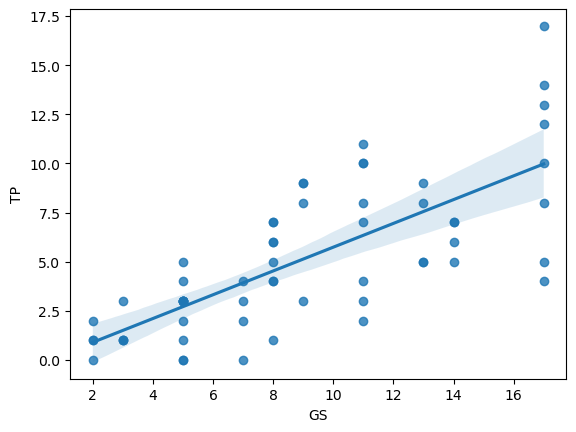

In [6]:
import seaborn as sns
df["Total Positives"] = df["TP"] + df["FP"]
sns.regplot(data=df, x="GS", y="TP", order=1)

<Axes: xlabel='GS', ylabel='FP'>

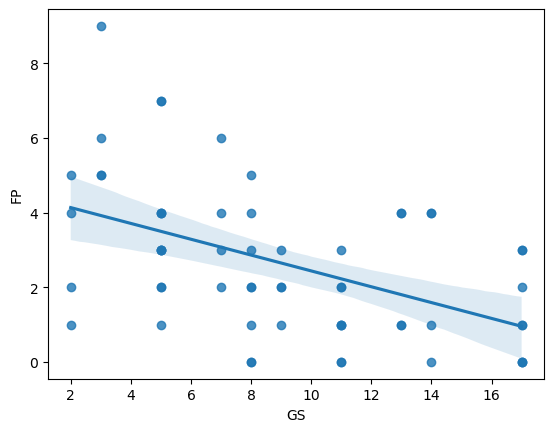

In [33]:
sns.regplot(data=df, x="GS", y="FP", order=1)

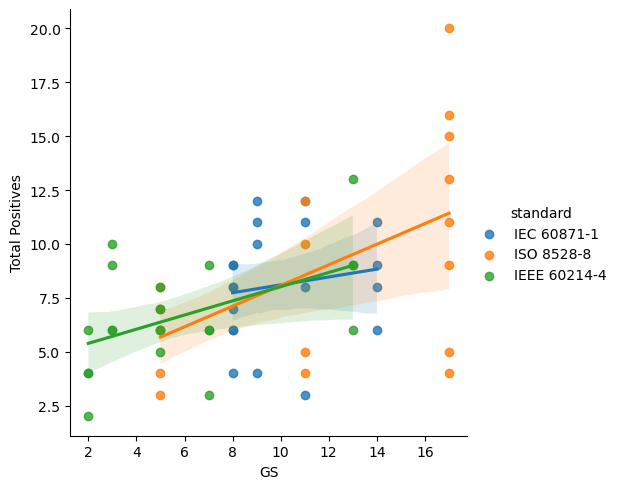

In [29]:
sns.lmplot(data=df, x="GS", y="Total Positives", hue="standard")

In [34]:
df.groupby("standard")["Total Positives"].sum()

standard
IEC 60871-1     162
IEEE 60214-4    134
ISO 8528-8      171
Name: Total Positives, dtype: int64

In [39]:
avg = df.groupby("prompt_type")["Total Positives"].mean()
avg.loc["zeroshot"] / avg.loc["fewshot"]

1.2132701421800949

In [54]:
avg = df.groupby(["prompt_type", "standard"])["Total Positives"].mean()

In [55]:
avg = pd.DataFrame(avg)
avg.reset_index(inplace=True)
avg

,prompt_type,standard,Total Positives
0,fewshot,IEC 60871-1,7.1
1,fewshot,IEEE 60214-4,5.7
2,fewshot,ISO 8528-8,8.3
3,zeroshot,IEC 60871-1,9.1
4,zeroshot,IEEE 60214-4,7.7
5,zeroshot,ISO 8528-8,8.8


/home/harry/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


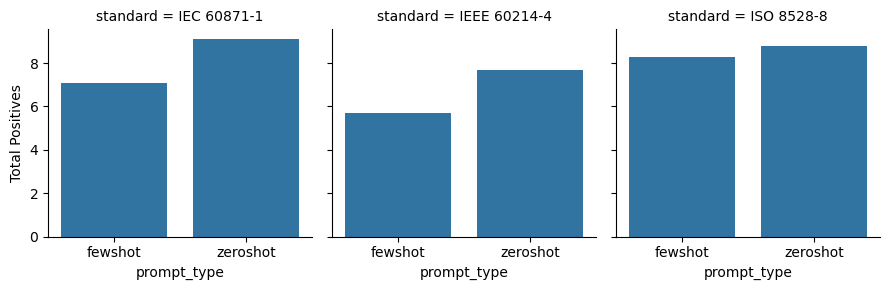

In [60]:
sns.FacetGrid(avg, col="standard", margin_titles=True).map(sns.barplot, "prompt_type", "Total Positives")

<Axes: >

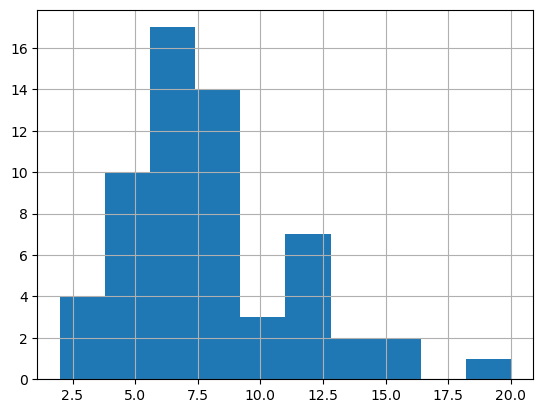

In [9]:
df["Total Positives"].hist()

In [12]:
df["Total Positives"].describe()

count    60.000000
mean      7.783333
std       3.479196
min       2.000000
25%       6.000000
50%       7.000000
75%       9.250000
max      20.000000
Name: Total Positives, dtype: float64

<Axes: xlabel='prompt_type', ylabel='Total Positives'>

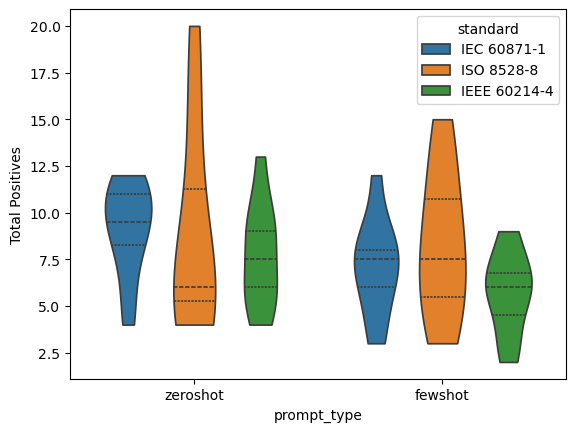

In [16]:
sns.violinplot(data=df, x="prompt_type", y="Total Positives", hue="standard", cut=0, inner="quart", gap=0.3)